In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Load the House Price Prediction dataset
house_data = pd.read_csv('data.csv')

In [24]:
# Explore the dataset
print(house_data.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [25]:
# Data Preprocessing: Remove any missing values or unwanted columns (if necessary)
# For example, you can drop the 'date', 'street', 'city', 'statezip', and 'country' columns
house_data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)
house_data.dropna(inplace=True)

In [26]:
# Split the dataset into features (X) and target (y)
X = house_data.drop('price', axis=1)
y = house_data['price']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create a Linear Regression model
model = LinearRegression()

In [29]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 986921767056.1454
R-squared: 0.03228385663275701


In [33]:
# Visualizations
plt.figure(figsize=(12, 5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

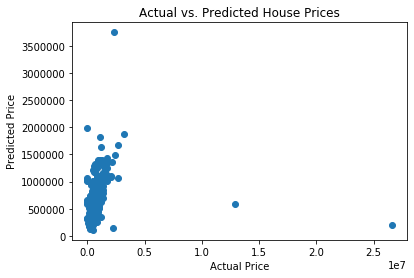

In [34]:
# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

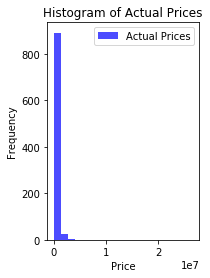

In [35]:
# Histogram of Actual Prices
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=20, color='blue', alpha=0.7, label='Actual Prices')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Actual Prices")
plt.legend()

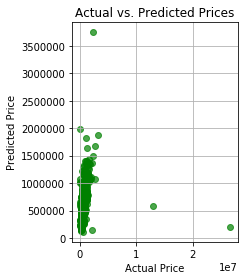

In [36]:
# Scatter Plot of Actual vs. Predicted Prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)

plt.tight_layout()
plt.show()

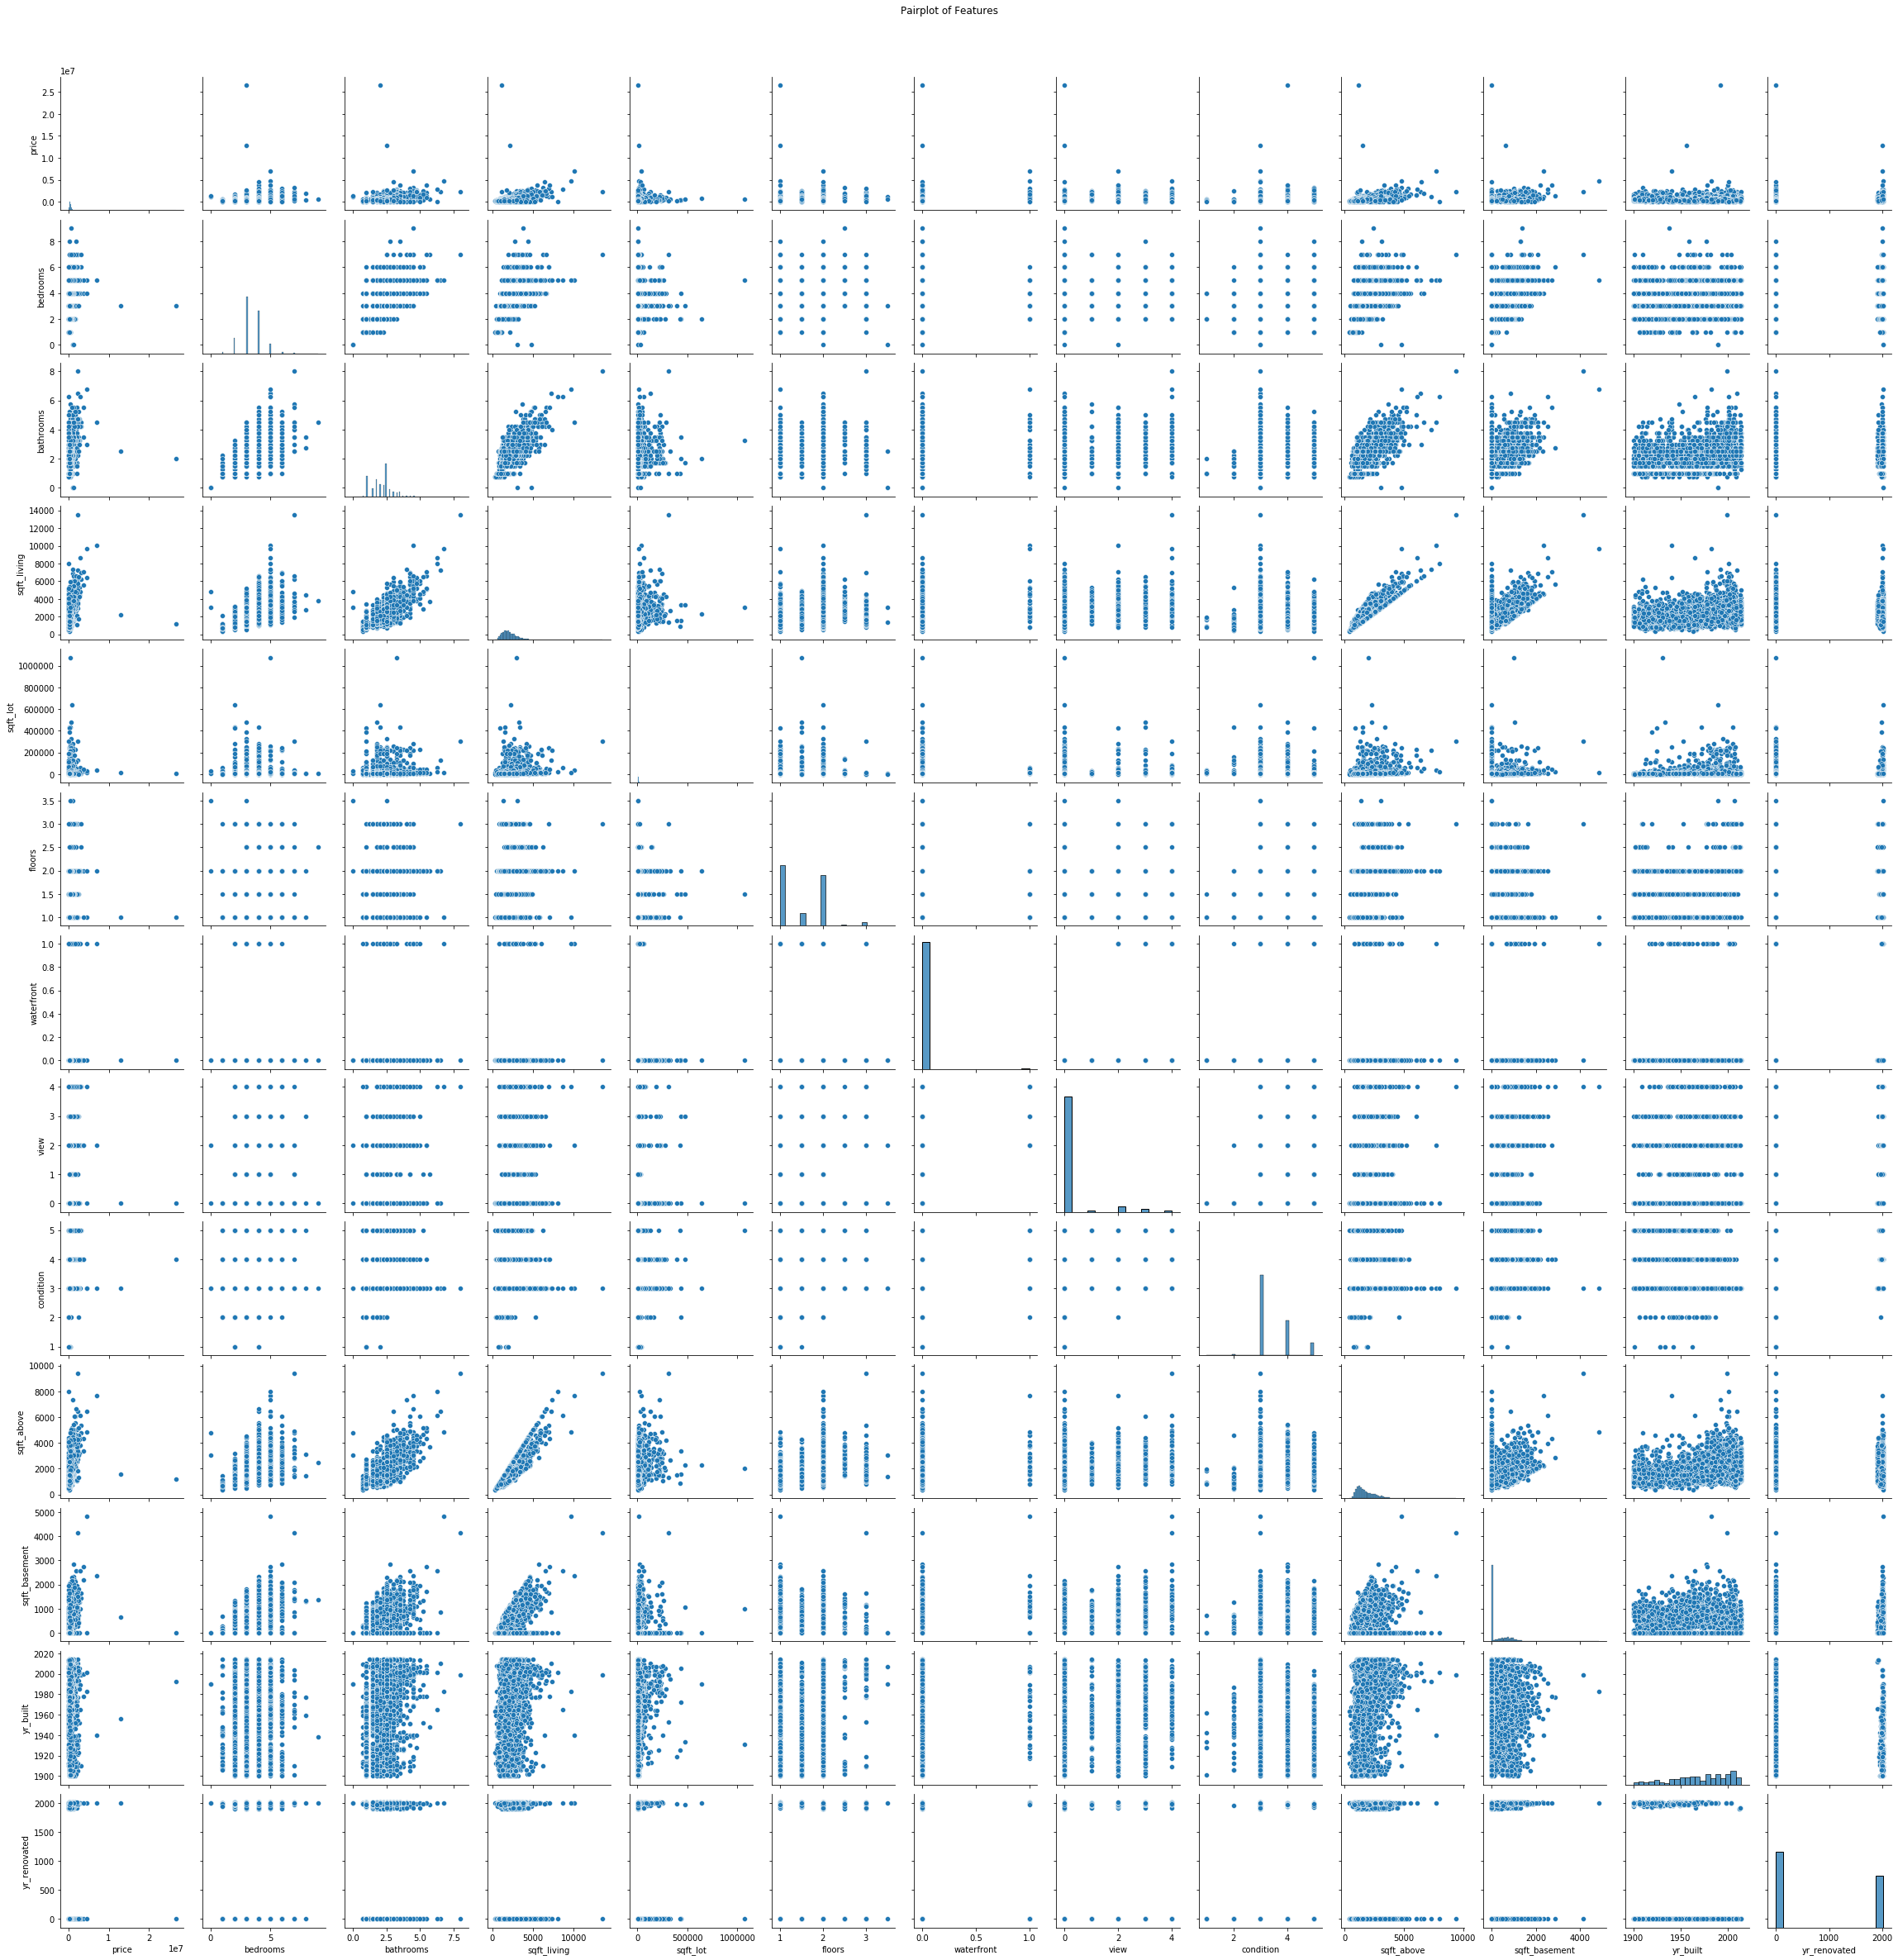

In [37]:
# Pairplot to visualize relationships between features
sns.pairplot(house_data, height=2.5)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

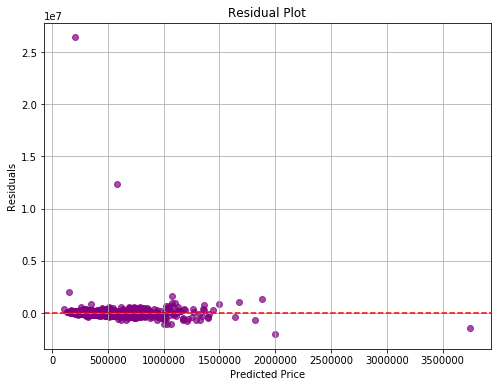

In [38]:
# Residual Plot to check for homoscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.7)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()